# **AYUDANTÍA 10 - Introducción a la Ciencia de Datos - IMT2200**
- Rocío Ladrón de Guevara (rociohgj@uc.cl)
- Daniela Victorero (dvictorerol@uc.cl)


# Apredizaje Supervisado

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



Leemos el dataset

In [ ]:
df_car = pd.read_csv("car.csv")
df_car.head()

Seleccionamos columnas que no son tipo object

In [ ]:
df_car = df_car.select_dtypes(exclude=['object'])
df_car.head()

Relacionaremos dos variables para este caso: carwidth y price

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.scatter(data = df_car, x = 'carwidth', y = 'price',  color = 'blue')
ax.set_xlabel("carwidth")
ax.set_ylabel("Price")
plt.title('carwidth v/s Price')

Separemos el dataset por datos para entrenamiento del modelo, y datos para testear el modelo.

In [ ]:
X = df_car[["carwidth"]]
Y = df_car["price"]


#Generalmente, el tamaño de los datos de entrenamiento son un 70% a 80%, y los de testeo un %30 a un %20
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# Regresion Lineal

In [ ]:
lr = LinearRegression()

Entrenemos el modelo de regresión lineal, ajustando los datos de entrenamiento establecidos anteriormente:

In [ ]:
lr.fit(x_train, y_train)

Generemos la predicción del modelo

In [ ]:
y_pred = lr.predict(x_test)

A partir de los datos de testeo, podemos medir que tan óptimo es nuestro modelo, en base a su predicción con la función score.

In [ ]:
lr.score(x_test, y_test)

In [ ]:
print("Error cuadrado medio : " + str(mean_squared_error(y_true = y_test, y_pred = y_pred)))
print("R2 : " + str(r2_score(y_true = y_test, y_pred = y_pred))) #es lo mismo que el score, coeficiente de correlación

Al gráficar, se hace más evidente que el modelo no tiene tan buena predicción.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.scatter(x_train, y_train, label = 'train', color = 'green')
ax.scatter(x_test, y_test, label = 'test', color = 'blue')



ax.plot(x_test, y_pred, color = 'red', label = 'linear regression')
ax.set_xlabel("carwidth")
ax.set_ylabel("Price")
ax.legend()
plt.title('carwidth v/s Price')

Generemos modelos de regresion simples y polinomiales, a partir de los datos ya separados anteriormente

¿Y si probamos con un ajuste polinomial?

# Regresion Polinomial


In [ ]:
poly = PolynomialFeatures(degree = 2, include_bias=False) #Haremos un ajuste polinomial de grado 2.


In [ ]:
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)

In [ ]:
plr = LinearRegression()

plr.fit(poly_x_train, y_train)


In [ ]:
y_pred_poly = plr.predict(poly_x_test)

In [ ]:
print("Error cuadrado medio : " + str(mean_squared_error(y_true = y_test, y_pred = y_pred_poly)))
print("R2 : " + str(r2_score(y_true = y_test, y_pred = y_pred_poly))) #es lo mismo que el score, coeficiente de correlación

In [ ]:
#Este paso es para ordenar los datos a gráficar, para que la curva a mostrar conecte los puntos de manera correcta.
df_results = pd.DataFrame()

df_results['x_test'] = x_test
df_results['y_pred_poly'] = y_pred_poly

df_results.sort_values(by = 'x_test', ascending = True, inplace = True)
    


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.scatter(x_train, y_train, label = 'train', color = 'green')
ax.scatter(x_test, y_test, label = 'test', color = 'blue')


ax.plot(df_results['x_test'], df_results['y_pred_poly'], color="red", label = "polynomial regression")
ax.set_xlabel("carwidth")
ax.set_ylabel("Price")
ax.legend()
plt.title('carwidth v/s Price')

# Regresion Lineal Multivariable

In [ ]:
X = df_car.drop(columns=["car_ID", "symboling", "price"])
Y = df_car["price"]

In [ ]:
X

Ya que estamos trabajando con variables que tienen diferentes magnitudes, debemos estandárizarlos, para que esta diferencia no afecte a nuestro modelo.

Pregunta ¿Se debe estandarizar antes o después de separar los datos en entrenamiento y test?

*Se deben estandarizar después, ya que si lo hacemos antes, los datos de entrenamiento se estarían normalizando con datos no existentes en su conjunto (o sea, con respecto a los datos de testeo).*

Se recomienda leer el siguiente foro: https://datascience.stackexchange.com/questions/54908/data-normalization-before-or-after-train-test-split
e investigar sobre *data leakage*.

In [21]:
#Generalmente, el tamaño de los datos de entrenamiento son un 70% a 80%, y los de testeo un %30 a un %20
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [22]:
x_train.values

array([[ 102.4,  175.6,   66.5, ..., 4200. ,   27. ,   32. ],
       [ 102.7,  178.4,   68. , ..., 5000. ,   19. ,   24. ],
       [ 102.4,  175.6,   66.5, ..., 4500. ,   30. ,   33. ],
       ...,
       [  94.5,  165.3,   63.8, ..., 5200. ,   31. ,   37. ],
       [ 102.9,  183.5,   67.7, ..., 5200. ,   19. ,   24. ],
       [ 100.4,  184.6,   66.5, ..., 5200. ,   17. ,   22. ]])

In [23]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train) 
x_test = sc.fit_transform(x_test)

In [24]:
x_train

array([[ 0.57330873,  0.07641283,  0.23510534, ..., -1.96616697,
         0.37011796,  0.27024799],
       [ 0.62287532,  0.30287987,  0.92498351, ..., -0.31833179,
        -0.98698122, -1.01793411],
       [ 0.57330873,  0.07641283,  0.23510534, ..., -1.34822878,
         0.87903015,  0.43127076],
       ...,
       [-0.73194494, -0.75666236, -1.00667538, ...,  0.093627  ,
         1.04866755,  1.07536181],
       [ 0.65591972,  0.71537342,  0.78700788, ...,  0.093627  ,
        -0.98698122, -1.01793411],
       [ 0.24286476,  0.80434261,  0.23510534, ...,  0.093627  ,
        -1.32625602, -1.33997964]])

In [25]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

print("Error cuadrado medio : " + str(mean_squared_error(y_true = y_test, y_pred = y_pred)))
print("R2 : " + str(r2_score(y_true = y_test, y_pred = y_pred))) #es lo mismo que el score, coeficiente de correlación

Error cuadrado medio : 13734578.406039964
R2 : 0.8017651499323053


# Regularización

¿Qué pasa si tenemos datos nuevos? ¿El modelo siempre se ajustará a esta nueva información?

Trabajemos nuevamente con el dataframe anterior

In [26]:
df_car

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


Imaginemos que por el momento sólo tenemos una parte de la información que tenemos ahora

In [27]:
df_car_initial = df_car[df_car['price'] < 13000]
df_car_added = df_car[df_car['price'] >= 13000]
df_car_initial

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.50,48,5100,47,53,5151.0
19,20,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.60,70,5400,38,43,6295.0
20,21,0,94.5,158.8,63.6,52.0,1909,90,3.03,3.11,9.60,70,5400,38,43,6575.0
21,22,1,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.41,68,5500,37,41,5572.0
22,23,1,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.40,68,5500,31,38,6377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,2,97.3,171.7,65.5,55.7,2300,109,3.19,3.40,10.00,100,5500,26,32,9995.0
189,190,3,94.5,159.3,64.2,55.6,2254,109,3.19,3.40,8.50,90,5500,24,29,11595.0
190,191,3,94.5,165.7,64.0,51.4,2221,109,3.19,3.40,8.50,90,5500,24,29,9980.0
193,194,0,100.4,183.1,66.9,55.1,2563,109,3.19,3.40,9.00,88,5500,25,31,12290.0


Text(0.5, 1.0, 'carwidth v/s Price')

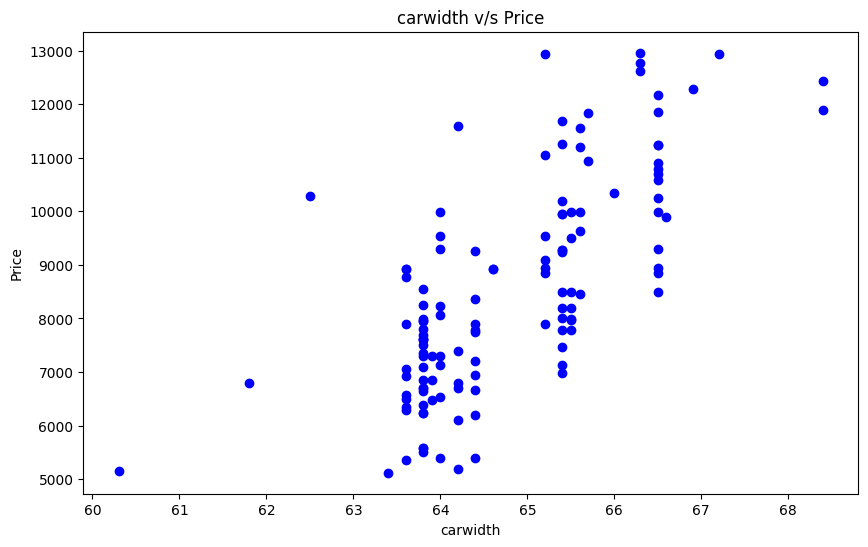

In [28]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.scatter(data = df_car_initial, x = 'carwidth', y = 'price',  color = 'blue')
ax.set_xlabel("carwidth")
ax.set_ylabel("Price")
plt.title('carwidth v/s Price')

Separemos por train y test, y generemos un modelo de Regresión Lineal:

In [29]:
X = df_car_initial[['carwidth']]
Y = df_car_initial["price"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

Text(0.5, 1.0, 'carwidth v/s Price')

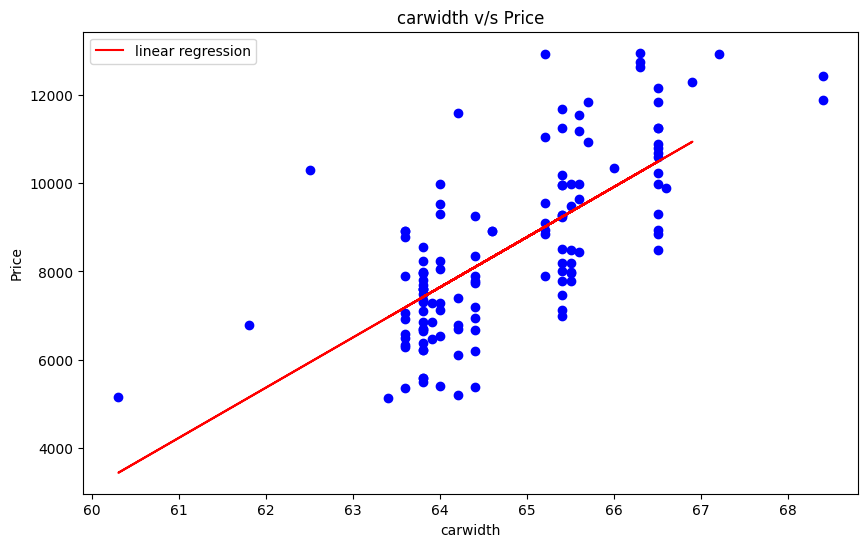

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.scatter(X, Y, color = 'blue')

ax.plot(x_test, y_pred, color = 'red', label = 'linear regression')
ax.set_xlabel("carwidth")
ax.set_ylabel("Price")
ax.legend()
plt.title('carwidth v/s Price')

Ahora, imaginemos que logramos recolectar datos extra

Text(0.5, 1.0, 'carwidth v/s Price')

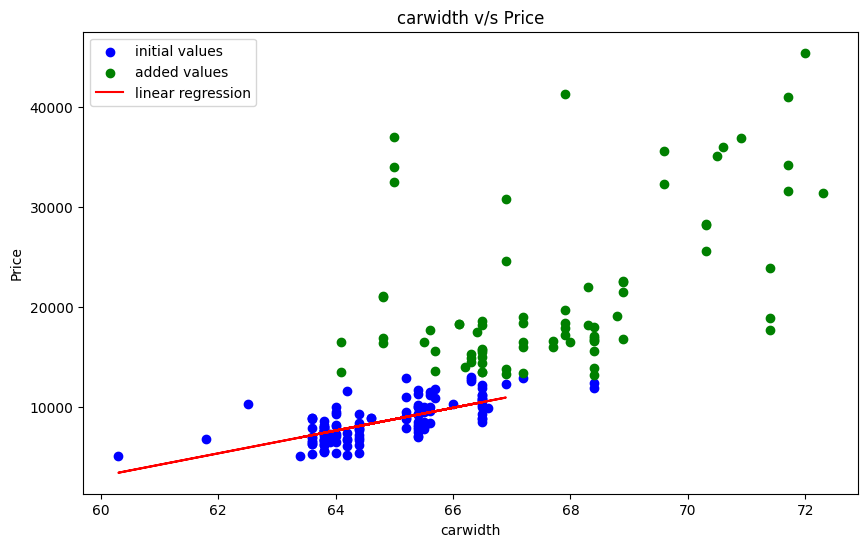

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.scatter(df_car_initial["carwidth"], df_car_initial["price"], color = 'blue', label = 'initial values')
ax.scatter(df_car_added["carwidth"], df_car_added["price"], color = 'green', label = 'added values')



ax.plot(x_test, y_pred, color = 'red', label = 'linear regression')
ax.set_xlabel("carwidth")
ax.set_ylabel("Price")
ax.legend()
plt.title('carwidth v/s Price')

El modelo no está bien ajustado a los nuevos datos

Para que un modelo pueda ajustarse bien a nuevos datos, la regresión necesita una *penalización*.

Las regresiones de Ridge y Lasso agregan una penalización a las regresiones ya existentes (de dos maneras distintas), lo cuál ayuda a generar modelos más optimos y evitar el *overfitting*.

Próxima ayudantía

- Regresiones Ridge y Lasso
- Determinar penalizaciones óptimas
- Regresión KNN